In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
#上面3个是回归类的对比
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

### 1.导入数据

In [2]:
## 记住这里的导入格式问题，括号里面肯定有参数，这个参数是False
# data = load_boston(return_X_y=False)
data = load_boston()
# data

In [3]:
x = pd.DataFrame(data.data)
y = data.target
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# data.feature_names
x.columns = data.feature_names
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


### 2.建模，查看其他接口和属性

In [6]:
x_train, x_test, y_train, y_test = TTS(x,y,test_size=0.3,random_state=420)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [7]:
reg = XGBR(n_estimators=100)   # 实例化，建立100棵树
reg = reg.fit(x_train,y_train)   #喂入数据，训练

In [8]:
reg.predict(x_test) #传统接口predict

array([ 8.165384 , 21.919355 , 29.843645 , 11.874415 ,  8.833874 ,
       20.698246 , 15.456877 , 15.544203 , 15.273806 , 13.444421 ,
       22.130966 , 35.072395 , 21.383947 , 27.477697 , 20.449163 ,
       10.434615 , 19.13851  , 24.973454 , 23.284975 , 23.22411  ,
       17.86431  , 17.218367 , 25.284815 , 20.962675 , 20.506361 ,
       16.18782  , 21.71437  , 31.687273 , 22.739857 , 15.976351 ,
       37.61867  , 20.701538 , 21.191647 , 23.53703  , 23.374733 ,
       24.682228 , 16.27922  , 24.404453 , 16.918646 , 34.06889  ,
       18.060398 , 21.352114 , 37.74781  , 17.90909  , 14.035863 ,
       28.243176 , 46.44803  , 14.748789 , 10.719417 , 35.26486  ,
       25.46181  , 21.976503 , 20.583235 , 49.3701   , 26.799538 ,
       26.286161 , 17.937538 , 20.566235 , 16.813719 , 18.816374 ,
       14.940857 , 22.213655 , 19.239632 , 30.246548 , 27.522081 ,
       18.951006 , 19.352182 , 15.716684 , 22.732222 , 19.14629  ,
       29.943521 , 43.593327 , 29.910528 , 22.987352 , 20.6698

In [9]:
reg.score(x_test,y_test)  #返回R的平方

0.9197580267581366

In [10]:
MSE(y_test,reg.predict(x_test))

7.466827353555599

In [11]:
reg.feature_importances_  #返回每个特征贡献多少的指标
# 也可以采用嵌入法-SelectFromModel

array([0.13862929, 0.0046729 , 0.02803738, 0.00623053, 0.08411215,
       0.16510904, 0.08566978, 0.15109034, 0.03271028, 0.0623053 ,
       0.06074766, 0.07632399, 0.10436137], dtype=float32)

In [12]:
## 查看sklearn模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### 3.交叉验证，与线性回归&随机森林进行对比

In [54]:
### 疯狂的调交叉验证的结果，是为了获得泛化能力好的模型，
reg = XGBR(n_estimators=100)  #交叉验证导入是没有训练的模型，没有fit
#交叉验证是用训练集还是全数据集？？？
#可以全数据--但是不严谨，因为没有了验证集。
#较严谨的是拿训练集做交叉验证。
CVS(reg,x_train,y_train,cv=5).mean()      # .mean()对5次交叉验证返回均值，R^2

0.8017863029875325

In [55]:
CVS(reg,x_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()

-16.041115480238048

In [56]:
score = CVS(reg,x_train,y_train,cv=5,scoring="neg_mean_squared_error")
rmse_score = np.sqrt(-score)
rmse_score

array([3.01223874, 5.20044044, 3.9237783 , 3.53918202, 4.02064284])

In [58]:
-score

array([ 9.07358221, 27.04458079, 15.39603618, 12.52580938, 16.16556884])

In [14]:
CVS(reg,x,y,cv=5).mean()      # .mean()对5次交叉验证返回均值,用全数据来看看结果

0.6826631518868911

In [15]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,x_train,y_train,cv=5).mean()

0.8066377717211765

In [16]:
CVS(rfr,x_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()

-16.909784780563378

In [17]:
#线性回归
lr = LinearR()
CVS(lr,x_train,y_train,cv=5).mean()

0.6835070597278092

In [18]:
CVS(lr,x_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()

-25.34950749364836

我们可以看到，根据xgboost,randomforest和线性回归这3个模型交叉验证的结果，在R^2项上，xgboost：0.8017863029875325, randomforest:0.8066377717211765,线性回归：0.6835070597278092，xgboost and randomforest表现均不差。

In [19]:
# 如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个
# 参数来监控模型的训练进度
reg = XGBR(n_estimators=10,silent=False)
CVS(reg,x_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()

[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:18:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

-92.67865836936579

### 4.定义绘制以训练样本为横坐标的学习曲线的函数

In [29]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_learning_curve(estimator,title,x,y,
                       ax=None,     #选择子图
                       ylim=None,   #设置横坐标的取值范围
                       cv=None,     #交叉验证
                       n_jobs=None  #设定所要使用的线程
                       ):
    train_sizes,train_scores,test_scores = learning_curve(estimator,x,y
                                                         ,shuffle=True
                                                         ,random_state=420
                                                         ,cv=cv
                                                         ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("score")
    ax.grid()# 绘制网格
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color="g")
    ax.plot(train_sizes,np.mean(train_scores,axis=1),"o-"
           ,color="r",label="training score")
    ax.plot(train_sizes,np.mean(test_scores,axis=1),"o-"
           ,color="g",label="test score")
    ax.legend(loc="best")
    return ax

### 5.使用学习曲线观察XGB在波士顿数据上的潜力

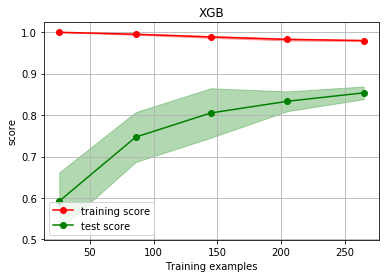

In [31]:
cv = KFold(n_splits=4,shuffle=True,random_state=400)
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                   ,"XGB",x_train,y_train,ax=None,cv=cv)
plt.show()

### 6.使用参数学习曲线观察n_estimator对模型的影响

160 0.8528601667921754


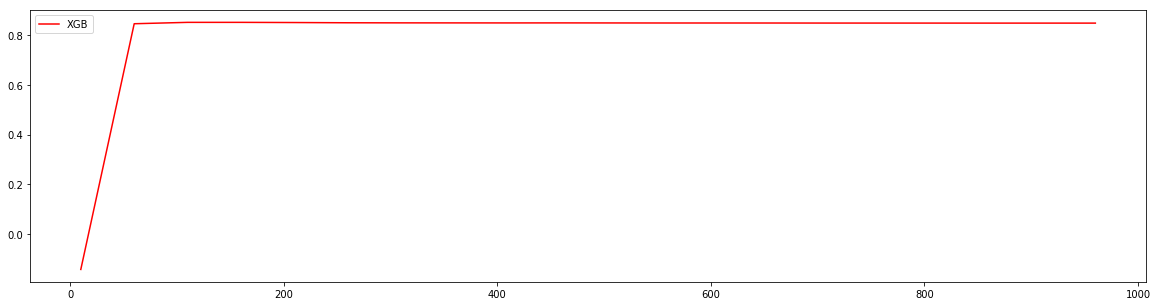

In [35]:
n_range = range(10,1010,50)
rs = []
for i in n_range:
#     print(i)
    reg = XGBR(n_estimators=i,random_state=420)
    R2 = CVS(reg,x_train,y_train,cv=cv).mean()
    rs.append(R2)
print(n_range[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(n_range,rs,c='red',label="XGB")
plt.legend()
plt.show()

### 7.进化的学习曲线：方差和泛化误差

150 0.8527598557815056 0.00031086957144067556
50 0.0002249335908598197 0.8409618812705135
150 0.2731114979389464 0.8527598557815056 0.00031086957144067556


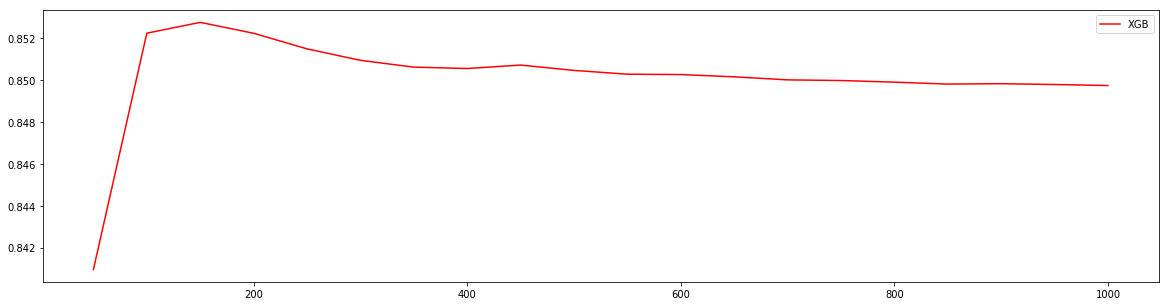

In [38]:
n_range = range(50,1050,50)
rs = []  #记录R2(均值呈现)
var = []  #记录方差  
ge = [] #记录泛化误差
for i in n_range:
#     print(i)
    reg = XGBR(n_estimators=i,random_state=420)
    R2 = CVS(reg,x_train,y_train,cv=cv)
    rs.append(R2.mean())#记录偏差
    var.append(R2.var())#记录方差
    E = 1-(R2.mean())**2+R2.var()
    ge.append(E)#记录泛化误差的可控部分
print(n_range[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(n_range[var.index(min(var))],min(var),rs[var.index(min(var))])
print(n_range[ge.index(min(ge))],min(ge),rs[ge.index(min(ge))],var[ge.index(min(ge))])
plt.figure(figsize=(20,5))
plt.plot(n_range,rs,c='red',label="XGB")
plt.legend()
plt.show() 

### 8.细化学习曲线，找出最佳n_estimator

130 0.8529459594407104 0.00030459134048838824
70 0.00022164117843408046 0.8491121619571911
130 0.2727877816142544 0.8529459594407104 0.00030459134048838824


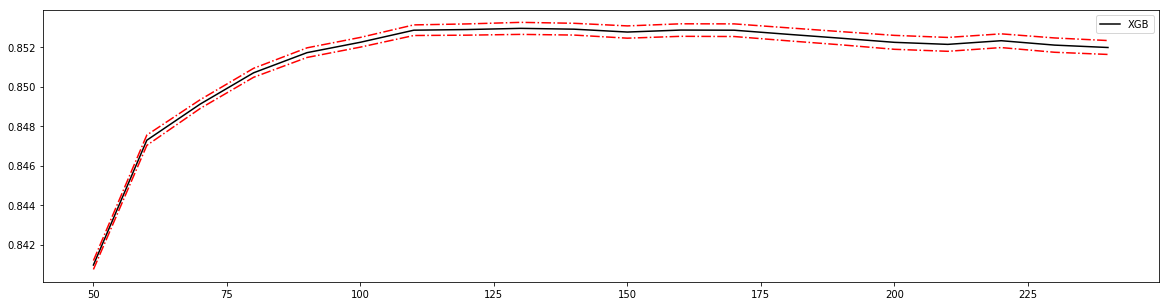

In [40]:
n_range = range(50,250,10)
rs = []  #记录R2(均值呈现)
var = []  #记录方差  
ge = [] #记录泛化误差
for i in n_range:
#     print(i)
    reg = XGBR(n_estimators=i,random_state=420)
    R2 = CVS(reg,x_train,y_train,cv=cv)
    rs.append(R2.mean())#记录偏差
    var.append(R2.var())#记录方差
    E = 1-(R2.mean())**2+R2.var()
    ge.append(E)#记录泛化误差的可控部分
print(n_range[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(n_range[var.index(min(var))],min(var),rs[var.index(min(var))])
print(n_range[ge.index(min(ge))],min(ge),rs[ge.index(min(ge))],var[ge.index(min(ge))])
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(n_range,rs,c='black',label="XGB")
###添加方差线
plt.plot(n_range,rs+var,c="red",linestyle="-.")
plt.plot(n_range,rs-var,c="red",linestyle="-.")
plt.legend()
plt.show() 

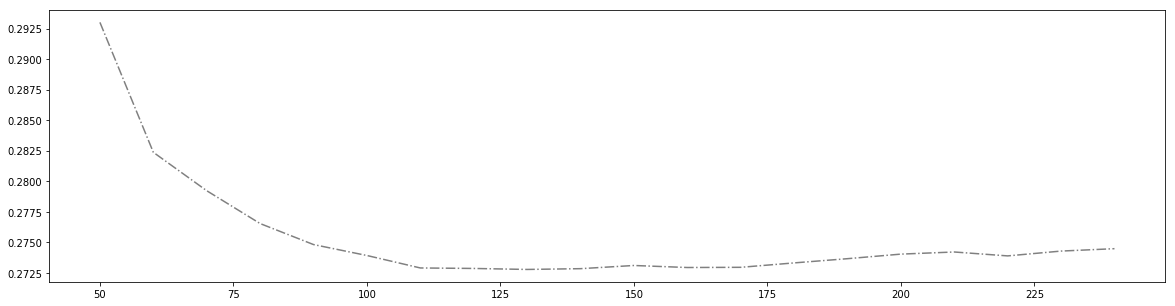

In [49]:
##看下泛化误差的可控部分如何
plt.figure(figsize=(20,5))
plt.plot(n_range,ge,c="gray",linestyle="-.")
plt.show()

### 9.检测模型效果

In [51]:
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(x_train,y_train).score(x_test,y_test))
print(time()-time0)

0.9197580267581366
0.04787087440490723


In [52]:
time0 = time()
print(XGBR(n_estimators=135,random_state=420).fit(x_train,y_train).score(x_test,y_test))
print(time()-time0)

0.9223242487319346
0.07280564308166504


In [53]:
time0 = time()
print(XGBR(n_estimators=160,random_state=420).fit(x_train,y_train).score(x_test,y_test))
print(time()-time0)

0.9227773251946939
0.08477425575256348
